# To begin, I will see whether there is a correlation between the average rating and price of a book before seeing whether any one genre, author or publisher stands out in a given cluster. 

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
import functions
df_metadata = functions.get_data()

With the metadata collected and the unnecessary columns removed I can begin analysis. **Hypothesis #1:** Is there a correlation between the number of reviews and the average rating of a book?

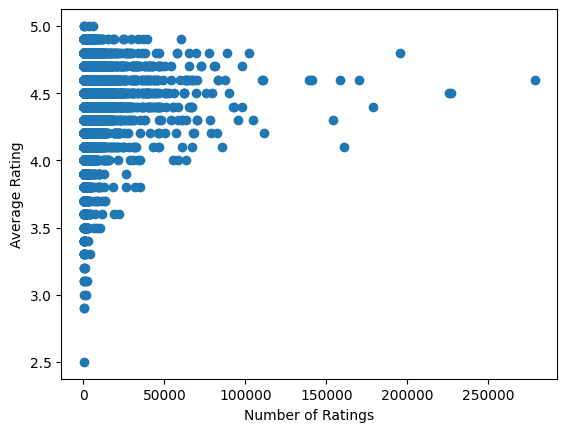

In [3]:
X = df_metadata['rating_number'].values
Y = df_metadata['average_rating'].values

plt.scatter(X,Y)
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.show()

No clear linear correlation, most of the data is skewed to the top in niche markets. The data does have a polynomial correlation.

**Hypothesis #2:** Comparing the page count against the price of the books in the dataset:

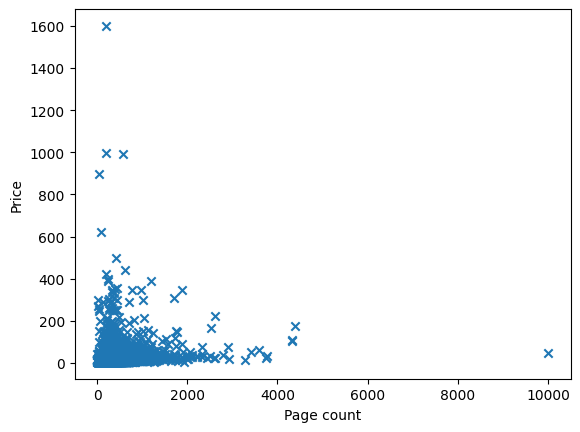

In [ ]:
page_count = df_metadata['page_count'].dropna() # Some of the books in the dataset have NaN for their page count. This function cleans them
price = df_metadata['price_numeric'][page_count.index] # Matches up the available data from the cleaned data.
plt.scatter(page_count, price, marker = 'x')
plt.xlabel('Page count')
plt.ylabel('Price')
plt.show()

Again, no clear correlations between Page Count and Price.

**Hypothesis #3:** Does an average rating correlate to a higher price? E.g. better quality = higher price

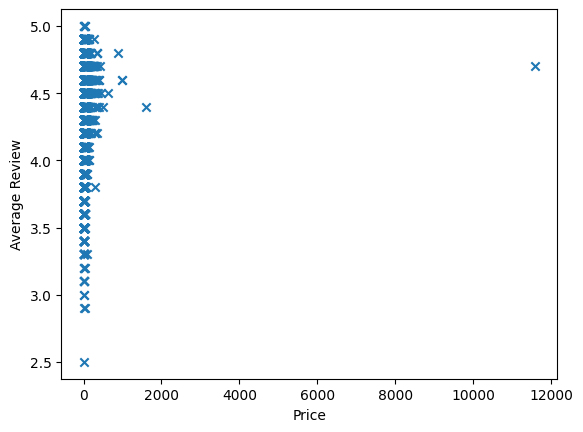

In [5]:
price = df_metadata['price_numeric']
reviews = df_metadata['average_rating']
plt.scatter(price,reviews , marker = 'x')
plt.xlabel('Price')
plt.ylabel('Average Review')
plt.show()

No linear correlation between to the two variables. However, there's a slight polynomial correlation between the two variables.

Seeing as there were no linear correlations between the variables that were chosen for analysis, a clustering alorithm will be used to see whether there is a correlation between average rating, numeric price and whether a genre stands out among the clusters.

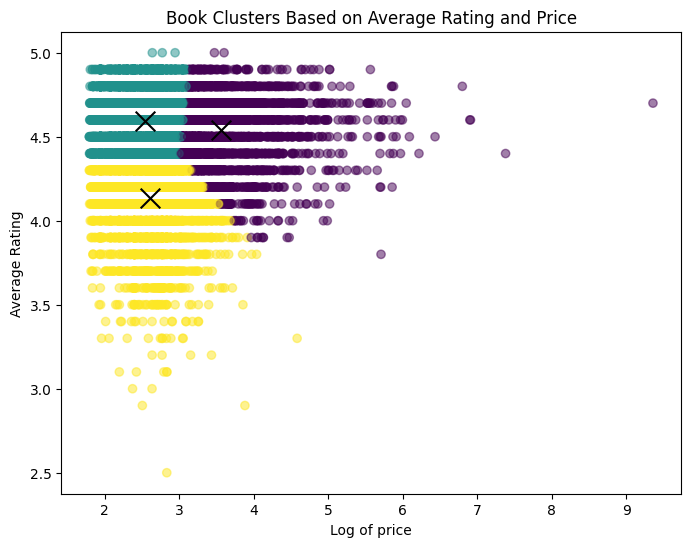

clusters
0    Literature & Fiction
1    Literature & Fiction
2    Literature & Fiction
dtype: object

In [ ]:
# Credit to ChatGPT which showed me how to make the following clustering algorithm and debugging my failed attempts.
X = df_metadata[['average_rating','price_numeric']].copy()
X['price_numeric'] = np.log1p(X['price_numeric']) # If the price isn't logarithmic, you cannot see all the clusters.

# Making my scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fitting to the clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)
df_metadata['clusters'] = labels

# Inverse transformation
centres = scaler.inverse_transform(kmeans.cluster_centers_)

#Plotting the clusters:
plt.figure(figsize=(8, 6))
plt.scatter(X['price_numeric'], X['average_rating'], c = df_metadata['clusters'], alpha = 0.5)
plt.scatter(centres[:,1], centres[:,0], c = 'k', s = 200, marker = 'x')
plt.xlabel('Log of price')
plt.ylabel('Average Rating')
plt.title('Book Clusters Based on Average Rating and Price')
plt.show()

# Showing the fractions of what genres in each cluster. Credit to ChatGPT for informing me of the pd.crosstab method to analyse strings in a dataset:
# I use this method twice again to analyse the popular authors and publishers in each cluster.
groups = pd.crosstab(df_metadata['clusters'], df_metadata['category_level_2_sub'], normalize = 'index')

# Seeing the most common genre in each cluster:
most_common_genre = groups.idxmax(axis=1)
most_common_genre

As it can be shown, the most common overall genres in each cluster is Literature and Fiction. 

Now, I want to see which authors dominate the different clusters:

In [14]:
author_groups = pd.crosstab(df_metadata['clusters'], df_metadata['author_name'], normalize = 'index')

# Seeing the most common authors:
most_common_author = author_groups.idxmax(axis = 1)
most_common_author

clusters
0       Stephen King
1    James Patterson
2    James Patterson
dtype: object

This result was a surprise. I wasn't expecting Stephen King to be dominating the low quality, low price cluster (Yellow). Nor was I expecting James Patterson to dominate both the high quality, low price and high quality, high price clusters. (Turquoise & Purple)

**Follow-up hypothesis:** If these authors dominate these clusters, then in theory their publishers should dominate them also:

In [15]:
publish_groups = pd.crosstab(df_metadata['clusters'], df_metadata['publisher'], normalize = 'index')

# Visualising the most common publishers in the clusters:
most_common_publisher = publish_groups.idxmax(axis = 1)
most_common_publisher

clusters
0                                        Pearson
1    CreateSpace Independent Publishing Platform
2    CreateSpace Independent Publishing Platform
dtype: object

The biggest surprise was the fact that Amazon's own independent publiblishing service dominates the high quality clusters (Turquoise and Purple). This shows that most consumers find under marketed books more popular than books from the likes of James Patterson who dominates the high quality clusters despite having a designated publisher. It goes to show that average consumer prefers independent authors regardless of the prices of their books.  